# Лабораторная работа № 7

## Деревья

1. 
a) Перепишите функции buildParseTree и evaluate из лекционных материалов так,
чтобы они работали с логическими выражениями, то есть с операторами «и», «или»,
«не» и операндами «истина» и «ложь». Помните, что «не» – унарный оператор.

In [15]:
class Stack:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[-1]

    def size(self):
        return len(self.items)


class BinaryTree:
    def __init__(self, rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self, newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t

    def insertRight(self, newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t

    def getRightChild(self):
        return self.rightChild

    def getLeftChild(self):
        return self.leftChild

    def setRootVal(self, obj):
        self.key = obj

    def getRootVal(self):
        return self.key

def buildParseTree(fpexp):
    fplist = fpexp.split()
    pStack = Stack()
    eTree = BinaryTree('')
    pStack.push(eTree)
    currentTree = eTree

    for token in fplist:

        if token == '(':
            currentTree.insertLeft('')
            pStack.push(currentTree)
            currentTree = currentTree.getLeftChild()

        elif token in ['истина', 'ложь']:
            currentTree.setRootVal(token == 'истина')
            parent = pStack.pop()
            currentTree = parent

        elif token in ['∧', '∨']:
            currentTree.setRootVal(token)
            currentTree.insertRight('')
            pStack.push(currentTree)
            currentTree = currentTree.getRightChild()

        elif token == '¬':
            currentTree.insertLeft('')
            pStack.push(currentTree)
            currentTree = currentTree.getLeftChild()
            currentTree.setRootVal('¬')
            currentTree.insertRight('')
            currentTree = currentTree.getRightChild()


        elif token == ')':
            currentTree = pStack.pop()

        else:
            raise ValueError("Неизвестный токен: " + token)

    return eTree


def evaluate(parseTree):
    opers = {
        '∧': lambda x, y: x and y,
        '∨': lambda x, y: x or y,
        '¬': lambda x: not x
    }

    left = parseTree.getLeftChild()
    right = parseTree.getRightChild()

    root = parseTree.getRootVal()

    if root == '¬':
        return opers['¬'](evaluate(right))

    if left and right:
        return opers[root](evaluate(left), evaluate(right))

    return root


pt = buildParseTree("( истина ∧ ложь )")

print(evaluate(pt))

False


b) Реализуйте функцию printexp, которая будет принимать дерево синтаксического
разбора и возвращать строку соответствующего ему логического выражения.

In [17]:
def printexp(tree):
    left = tree.getLeftChild()
    right = tree.getRightChild()
    root = tree.getRootVal()

    if root == '¬':  # унарный оператор
        return f'(¬ {printexp(right)})'
    elif left and right:  # бинарный оператор
        return f'({printexp(left)} {root} {printexp(right)})'
    else:
        return str(root)


pt = buildParseTree("( истина ∨ истина )")
expr_str = printexp(pt)
print(expr_str)

(True ∨ True)


2. 
a) Реализуйте функцию has_no_duplicates, которая принимает в качестве аргумента
двоичное дерево поиска и возвращает «истину» если в нем нет равных ключей и
«ложь» в противном случае.

In [6]:
def has_no_duplicates(tree):
    def in_order(node, prev):
        if node is None:
            return True, prev
        # Проверяем левое поддерево
        ok, prev = in_order(node.getLeftChild(), prev)
        if not ok:
            return False, prev
        # Проверяем текущий узел
        if prev is not None and node.getRootVal() == prev:
            return False, prev
        prev = node.getRootVal()
        # Проверяем правое поддерево
        return in_order(node.getRightChild(), prev)

    result, _ = in_order(tree, None)
    return result

bst = BinaryTree(5)
bst.insertLeft(3)
bst.insertRight(7)
bst.getLeftChild().insertLeft(2)
bst.getLeftChild().insertRight(4)
bst.getRightChild().insertLeft(6)
bst.getRightChild().insertRight(8)

print(has_no_duplicates(bst))

bst.getRightChild().insertRight(8)
print(has_no_duplicates(bst))

True
False


b) Измените реализацию двоичного дерева поиска из лекционных материалов так,
чтобы оно правильно работало с дубликатами ключей. Т.е., если ключ в дереве уже
присутствует, то новое значение должно заменить старое, вместо того, чтобы
добавлять новый узел с тем же ключом. Проверьте правильность вашего решения
функцией has_no_duplicates.

In [8]:
class BinarySearchTree:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

    def insert(self, key):
        if key < self.key:
            if self.left is None:
                self.left = BinarySearchTree(key)
            else:
                self.left.insert(key)
        elif key > self.key:
            if self.right is None:
                self.right = BinarySearchTree(key)
            else:
                self.right.insert(key)
        else:
            # Дубликат — заменяем старое значение
            self.key = key

    def getLeftChild(self):
        return self.left

    def getRightChild(self):
        return self.right

    def getRootVal(self):
        return self.key


bst = BinarySearchTree(10)
bst.insert(5)
bst.insert(15)
bst.insert(5)   # дубликат — заменит старое значение
bst.insert(12)

print(has_no_duplicates(bst))  # True, потому что дубликат заменён, а не добавлен

True


3. Суть игры «Животные» заключается в следующем: программа пытается угадать
задуманное пользователем животное и при этом самообучается, то есть постепенно
совершенствуется. Вся необходимая информация хранится в бинарном дереве, каждая
вершина которого содержит вопрос, предполагающий ответ «да» или «нет».
Последовательный выбор одного из этих ответов ведет программу вниз по
соответствующим ветвям до терминальной вершины, где и находится название животного.
Если программа совершает ошибку, она просит пользователя ввести уточняющий вопрос,
который позволил бы ей прийти к верному решению, затем добавляет его в новую
внутреннюю вершину и создает для нее свои листья.

Предположим, текущая база знаний программы выглядит так, как на рисунке, и
пользователь загадал змею. В таблице приводятся список вопросов, которые задает
программа, и полученные ответы пользователя.

![CleanShot 2025-12-16 at 13.07.37@2x.png](<attachment:CleanShot 2025-12-16 at 13.07.37@2x.png>)

Если задуман жираф, вопросы и ответы прозвучат иначе, а программа добавит в дерево
уточняющую информацию и нужное животное.

![CleanShot 2025-12-16 at 13.08.01@2x.png](<attachment:CleanShot 2025-12-16 at 13.08.01@2x.png>)

Реализуйте эту игру, используя бинарное дерево для хранения вопросов и ответов.
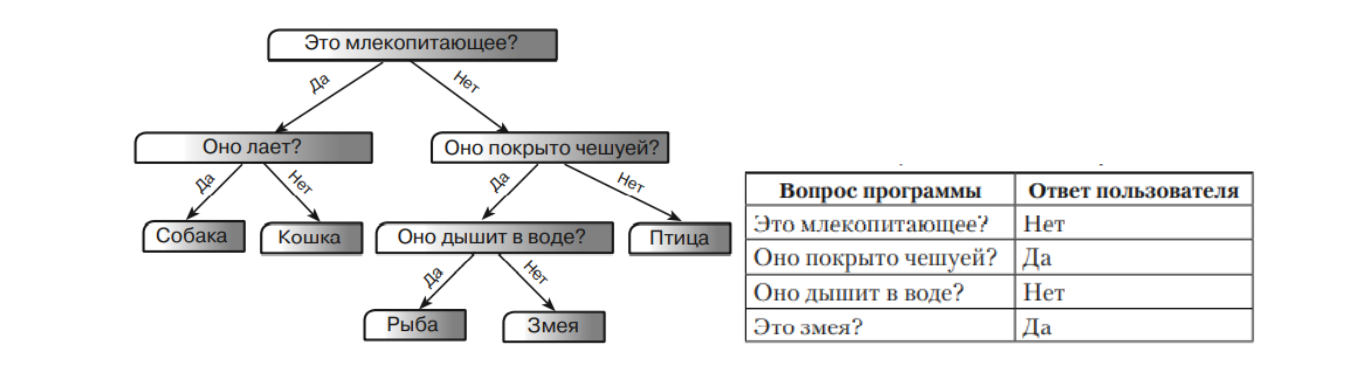
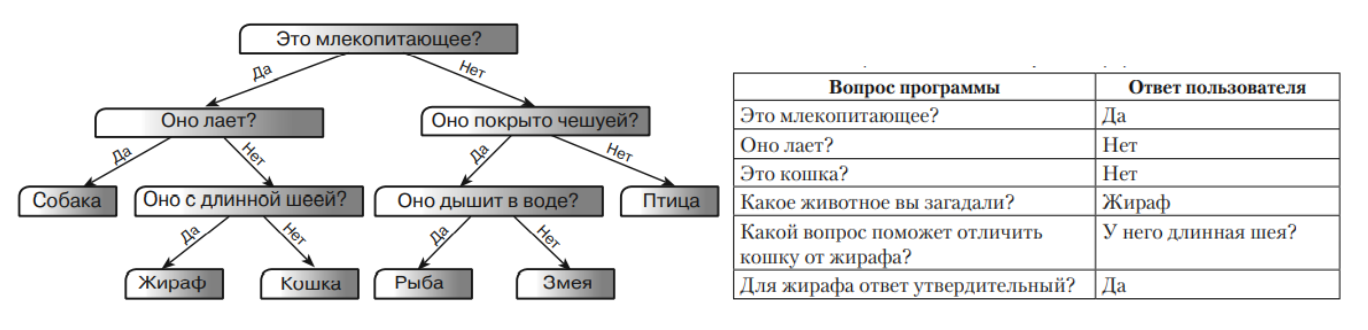

In [ ]:
class Node:
    def __init__(self, data, yes=None, no=None):
        self.data = data   # вопрос или животное
        self.yes = yes     # ветвь "да"
        self.no = no       # ветвь "нет"


dog = Node("Собака")
cat = Node("Кошка")
fish = Node("Рыба")
snake = Node("Змея")
bird = Node("Птица")

q4 = Node("Оно дышит в воде?", fish, snake)
q3 = Node("Оно покрыто чешуей?", q4, bird)
q2 = Node("Оно лает?", dog, cat)
q1 = Node("Это млекопитающее?", q2, q3)

root = q1

def play(node):
    if node.yes is None and node.no is None:
        ans = input(f"Ваше животное {node.data}?")
        if ans.lower() == "yes":
            print("Ура")
            return node
        else:
            new_animal = input("Какое животное вы загадали?: ").strip()
            new_question = input(f"Придумайте вопрос, чтобы отличить {new_animal} от {node.data}: ").strip()
            ans_for_new = input(f"Для {new_animal} ответ на этот вопрос будет yes или no?: ").strip().lower()

            if ans_for_new == "yes":
                return Node(new_question, Node(new_animal), node)
            else:
                return Node(new_question, node, Node(new_animal))

    else:
        ans = input(f"{node.data} (yes/no): ").strip().lower()
        if ans == "yes":
            node.yes = play(node.yes)
        else:
            node.no = play(node.no)
        return node




while True:
    root = play(root)
    again = input("Хотите сыграть ещё раз? (yes/no): ").strip().lower()
    if again != "yes":
        break

Ура


4. Создайте двоичную кучу с ограниченным размером. Другими словами, куча может
отслеживать только n важных элементов. Если её размер становится больше, то наименее
приоритетный элемент отбрасывается.

In [22]:
class BinHeap:
    def __init__(self):
        self.heapList = [0]
        self.currentSize = 0

    def percUp(self, i):
        while i // 2 > 0:
            if self.heapList[i] < self.heapList[i // 2]:
                tmp = self.heapList[i // 2]
                self.heapList[i // 2] = self.heapList[i]
                self.heapList[i] = tmp
            i = i // 2

    def insert(self, k):
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)

    def percDown(self, i):
        while (i * 2) <= self.currentSize:
            mc = self.minChild(i)
            if self.heapList[i] > self.heapList[mc]:
                tmp = self.heapList[i]
                self.heapList[i] = self.heapList[mc]
                self.heapList[mc] = tmp
            i = mc

    def minChild(self, i):
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i * 2] < self.heapList[i * 2 + 1]:
                return i * 2
            else:
                return i * 2 + 1

    def delMin(self):
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapList.pop()
        self.percDown(1)
        print(retval, ' deleted')
        return retval

    def buildHeap(self, alist):
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        while (i > 0):
            self.percDown(i)
            i = i - 1

        while self.currentSize > 10:
            self.delMin()




bh = BinHeap()
bh.buildHeap([9, 5, 6, 2, 3, 1, 10, 12, 1, 0, 10, 17, 1])

0  deleted
1  deleted
1  deleted


5. Реализуйте двоичную кучу как max heap на основание варианта min heap из лекционных материалов.

In [18]:
class MaxBinHeap:
    def __init__(self):
        self.heapList = [0]
        self.currentSize = 0

    def percUp(self, i):
        while i // 2 > 0:
            if self.heapList[i] > self.heapList[i // 2]:
                self.heapList[i], self.heapList[i // 2] = self.heapList[i // 2], self.heapList[i]
            i = i // 2

    def insert(self, k):
        self.heapList.append(k)
        self.currentSize += 1
        self.percUp(self.currentSize)

    def percDown(self, i):
        while (i * 2) <= self.currentSize:
            mc = self.maxChild(i)
            if self.heapList[i] < self.heapList[mc]:
                self.heapList[i], self.heapList[mc] = self.heapList[mc], self.heapList[i]
            i = mc

    def maxChild(self, i):
        if i * 2 + 1 > self.currentSize:
            return i * 2
        if self.heapList[i * 2] > self.heapList[i * 2 + 1]:
            return i * 2
        return i * 2 + 1

    def delMax(self):
        if self.currentSize == 0:
            raise IndexError("delMax from empty heap")
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize -= 1
        self.heapList.pop()
        if self.currentSize > 0:
            self.percDown(1)
        return retval

    def buildHeap(self, alist):
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        while i > 0:
            self.percDown(i)
            i -= 1


# проверка
mh = MaxBinHeap()
mh.buildHeap([9, 5, 6, 2, 3, 1, 10, 12, 1, 0, 10, 17, 1])

while mh.currentSize > 0:
    print(mh.delMax())

17
12
10
10
9
6
5
3
2
1
1
1
0


6. Используя класс BinaryHeap из лекционных материалов, реализуйте новый класс очереди с
приоритетом PriorityQueue. Он должен содержать конструктор и методы enqueue и dequeue.

In [23]:
class PriorityQueue:
    def __init__(self):
        self.heap = BinHeap()

    def enqueue(self, item):
        self.heap.insert(item)

    def dequeue(self):
        if self.is_empty():
            raise IndexError("dequeue from empty priority queue")
        return self.heap.delMin()

    def is_empty(self):
        return self.heap.currentSize == 0

pq = PriorityQueue()
pq.enqueue(9)
pq.enqueue(5)
pq.enqueue(6)
pq.enqueue(2)
pq.enqueue(3)

while not pq.is_empty():
    print(pq.dequeue())

2  deleted
2
3  deleted
3
5  deleted
5
6  deleted
6
9  deleted
9
